In [1]:
# to add in report

# determine if qqq.ddd, lnc,ltc? or what?

In [2]:
# !pip install contractions
# !pip install word2number
# !pip install spacy

In [3]:
# !pip install matplotlib

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
import pandas as pd
import numpy as np

import os
import re
import requests

from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
# import spacy
import unidecode
from word2number import w2n
import contractions
# nltk.download('stopwords')
from nltk.corpus import stopwords
import timeit
import pickle

import math

# Combining the webscraped data

In [3]:
df = pd.read_csv("movies.csv")
df.head()

,titles,genre,duration,rating,year,certification,url,director,cast,query_1_rel,query_2_rel,query_3_rel,query_4_rel,query_5_rel
0,Jai_Bhim,"Crime, Drama, Mystery",164,9.4,2021,NC16,https://www.imdb.com//title/tt15097216/,T.J. Gnanavel,"['Suriya', 'Lijo Mol Jose', 'Manikandan K.', '...",0.0,1.0,0.0,1.0,0.0
1,Soorarai_Pottru,Drama,153,9.3,2020,PG13,https://www.imdb.com//title/tt10189514/,Sudha Kongara,"['Suriya', 'Prakash Belawadi', 'Paresh Rawal',...",0.0,0.0,1.0,0.0,0.0
2,The_Shawshank_Redemption,Drama,142,9.3,1994,R(A),https://www.imdb.com//title/tt0111161/,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",0.0,0.0,1.0,0.0,0.0
3,The_Godfather,"Crime, Drama",175,9.2,1972,M18,https://www.imdb.com//title/tt0068646/,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",0.0,1.0,0.0,1.0,0.0
4,The_Dark_Knight,"Action, Crime, Drama",152,9.1,2008,PG,https://www.imdb.com//title/tt0468569/,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",0.0,1.0,0.0,0.0,0.0


In [4]:
import string

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def get_topics_page(url):
    
    response=requests.get(url)
    # check successfull response
    if response.status_code != 200:
        raise Exception(f'Failed to load page {topic_url}')
    # Parse using BeautifulSoup
    doc = BeautifulSoup(response.text, 'html.parser')
    return doc

In [5]:
review_urls = df['url']
review_doc = get_topics_page(review_urls[0] + "reviews/?ref_=tt_ql_urv")
def get_reviews(doc):
        
    review_tags=doc.find_all('div',{'class': "content"}) #"text show-more__control clickable" or
    reviews=[]

    for tag in review_tags:
        review = tag.find('div',{'class': "text show-more__control"}).text
        review = remove_punctuation(review)
        reviews.append(str(review))
    
    return reviews

In [21]:
# # get top 25 reviews each for all 1000 movies
# df1000_list = []
# for i in range(len(df)):
#     review_doc = get_topics_page(df['url'][i] + "reviews/?ref_=tt_ql_urv")
#     one_movie_all_reviews = get_reviews(review_doc)
#     df1000_list.append(one_movie_all_reviews)

In [22]:
# df['review'] = df1000_list

In [23]:
# df.to_csv("data_1000_movies.csv")

In [24]:
df= pd.read_csv("data_1000_movies.csv")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1000 non-null   int64  
 1   Unnamed: 0.1   1000 non-null   int64  
 2   titles         1000 non-null   object 
 3   genre          1000 non-null   object 
 4   duration       1000 non-null   int64  
 5   rating         1000 non-null   float64
 6   year           1000 non-null   object 
 7   certification  907 non-null    object 
 8   url            1000 non-null   object 
 9   director       1000 non-null   object 
 10  cast           1000 non-null   object 
 11  review         1000 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 93.9+ KB


In [70]:
df= pd.read_csv("data_1000_movies.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,titles,genre,duration,rating,year,certification,url,director,cast,review
0,0,0,Jai_Bhim,"Crime, Drama, Mystery",164,9.4,2021,NC16,https://www.imdb.com//title/tt15097216/,T.J. Gnanavel,"['Suriya', 'Lijo Mol Jose', 'Manikandan K.', '...",['Theres some serious upvoting for this film h...
1,1,1,Soorarai_Pottru,Drama,153,9.3,2020,PG13,https://www.imdb.com//title/tt10189514/,Sudha Kongara,"['Suriya', 'Prakash Belawadi', 'Paresh Rawal',...",['Soorarai Pottru 2020 \nBrief Review A Major ...
2,2,2,The_Shawshank_Redemption,Drama,142,9.3,1994,R(A),https://www.imdb.com//title/tt0111161/,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Shawshank Redemption is without doubt one of...
3,3,3,The_Godfather,"Crime, Drama",175,9.2,1972,M18,https://www.imdb.com//title/tt0068646/,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",['Up until today I havent bothered to review T...
4,4,4,The_Dark_Knight,"Action, Crime, Drama",152,9.1,2008,PG,https://www.imdb.com//title/tt0468569/,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",['I first need to point out that I generally h...


# Preprocessing Steps
- Lowering the Text
- Remove HTML tags
- Expand contracted words
- Punctuation Removal
- Tokenization
- Remove Stopwords
- Stemming

## Lowering the Text

In [71]:
def convert_lower_case(data):
    return data.lower()

In [72]:
# # lowering text
# df['review']= df['review'].apply(lambda x: x.lower())
# # data['review'] = data['review'].apply(convert_lower_case)

## Remove HTML Tags

In [73]:
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

In [74]:
# df['review']= df['review'].apply(lambda x:strip_html_tags(x))

## Expand contractions

In [75]:
def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    return text

In [76]:
# df['review'] = df['review'].apply(lambda x:expand_contractions(x))

## Remove Punctuation

In [77]:
import string

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    # punctuationfree = re.sub(r'[^\w]', ' ', punctuationfree)
    return punctuationfree
#storing the puntuation free text
# df['review']= df['review'].apply(lambda x:remove_punctuation(x))

## Remove numbers

In [181]:
# def remove_numbers(text):
#     no_number_string = re.sub(r'\d+','',text)
#     return no_number_string

# # df['review'] = df['review'].apply(lambda x: remove_numbers(x))

In [182]:
df['review'].head()

TypeError: 'int' object is not subscriptable

## Spell Checking

In [80]:
# from spellchecker import SpellChecker

# spell = SpellChecker()

# def correct_spellings(text):
#     corrected_text = []
#     misspelled_words = spell.unknown(text.split())
#     for word in text.split():
#         if word in misspelled_words:
#             corrected_text.append(spell.correction(word))
#         else:
#             corrected_text.append(word)
#     return " ".join(corrected_text)
    

In [81]:
text =df['review'][0]
text[4]

'e'

In [83]:
df['review'].head()

0    ['Theres some serious upvoting for this film h...
1    ['Soorarai Pottru 2020 \nBrief Review A Major ...
2    ['Shawshank Redemption is without doubt one of...
3    ['Up until today I havent bothered to review T...
4    ['I first need to point out that I generally h...
Name: review, dtype: object

In [84]:
movie_title_list = df['titles'].unique()

movie_title_list = list(movie_title_list)
# movie_title_list.remove('\x1a') # strange title (error)

movie_reviews_df = pd.DataFrame(movie_title_list, columns = ['title'])
movie_reviews_df['user_numeric_rating'] = df['rating']
movie_reviews_df['reviews'] = df['review']
movie_reviews_df['reviews']

0      ['Theres some serious upvoting for this film h...
1      ['Soorarai Pottru 2020 \nBrief Review A Major ...
2      ['Shawshank Redemption is without doubt one of...
3      ['Up until today I havent bothered to review T...
4      ['I first need to point out that I generally h...
                             ...                        
993    ['This is an average film masquerading as grea...
994    ['In general I am NOT a fan of suspense films ...
995    ['This is a pretty good horrorsuspense filmwit...
996    ['This film is about a young lady Sabrina Audr...
997    ['This is a very good wartime soap operawith a...
Name: reviews, Length: 998, dtype: object

## Word Tokenization

-of reviews

In [85]:
df.head()

,Unnamed: 0,Unnamed: 0.1,titles,genre,duration,rating,year,certification,url,director,cast,review
0,0,0,Jai_Bhim,"Crime, Drama, Mystery",164,9.4,2021,NC16,https://www.imdb.com//title/tt15097216/,T.J. Gnanavel,"['Suriya', 'Lijo Mol Jose', 'Manikandan K.', '...",['Theres some serious upvoting for this film h...
1,1,1,Soorarai_Pottru,Drama,153,9.3,2020,PG13,https://www.imdb.com//title/tt10189514/,Sudha Kongara,"['Suriya', 'Prakash Belawadi', 'Paresh Rawal',...",['Soorarai Pottru 2020 \nBrief Review A Major ...
2,2,2,The_Shawshank_Redemption,Drama,142,9.3,1994,R(A),https://www.imdb.com//title/tt0111161/,Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Shawshank Redemption is without doubt one of...
3,3,3,The_Godfather,"Crime, Drama",175,9.2,1972,M18,https://www.imdb.com//title/tt0068646/,Francis Ford Coppola,"['Marlon Brando', 'Al Pacino', 'James Caan', '...",['Up until today I havent bothered to review T...
4,4,4,The_Dark_Knight,"Action, Crime, Drama",152,9.1,2008,PG,https://www.imdb.com//title/tt0468569/,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",['I first need to point out that I generally h...


In [87]:
def preprocess(data):
    data = convert_lower_case(data)
    data = strip_html_tags(data)
    data = expand_contractions(data)
    data = remove_punctuation(data)
    # data = remove_numbers(data)
    # data = correct_spellings(data)

    return data

In [89]:
movie_reviews_df['reviews'] = movie_reviews_df['reviews'].apply(lambda x:preprocess(x))

In [90]:
movie_reviews_df.head()

,title,user_numeric_rating,reviews
0,Jai_Bhim,9.4,there is some serious upvoting for this film h...
1,Soorarai_Pottru,9.3,soorarai pottru 2020 nbrief review a major ach...
2,The_Shawshank_Redemption,9.3,shawshank redemption is without doubt one of t...
3,The_Godfather,9.2,up until today i have not bothered to review t...
4,The_Dark_Knight,9.1,i first need to point out that i generally hat...


## Tokenization

In [91]:
movie_reviews_df['term_dict'] = "" # initilialise tokenized word list from reviews 
term_dict = []
for i in range(len(movie_reviews_df)):
    word_data = movie_reviews_df['reviews'][i] 
    word_list = nltk.word_tokenize(word_data)
    term_dict.append(word_list)
movie_reviews_df['term_dict'] = term_dict

In [93]:
movie_reviews_df.head()

,title,user_numeric_rating,reviews,term_dict
0,Jai_Bhim,9.4,there is some serious upvoting for this film h...,"[there, is, some, serious, upvoting, for, this..."
1,Soorarai_Pottru,9.3,soorarai pottru 2020 nbrief review a major ach...,"[soorarai, pottru, 2020, nbrief, review, a, ma..."
2,The_Shawshank_Redemption,9.3,shawshank redemption is without doubt one of t...,"[shawshank, redemption, is, without, doubt, on..."
3,The_Godfather,9.2,up until today i have not bothered to review t...,"[up, until, today, i, have, not, bothered, to,..."
4,The_Dark_Knight,9.1,i first need to point out that i generally hat...,"[i, first, need, to, point, out, that, i, gene..."


In [ ]:
# movie_reviews_df.to_pickle("term_dict.pkl")

# df_new = pd.read_pickle("term_dict.pkl")

# # df_new.head()

In [97]:
movie_reviews_df.head()

,title,user_numeric_rating,reviews,term_dict
0,Jai_Bhim,9.4,there is some serious upvoting for this film h...,"[there, is, some, serious, upvoting, for, this..."
1,Soorarai_Pottru,9.3,soorarai pottru 2020 nbrief review a major ach...,"[soorarai, pottru, 2020, nbrief, review, a, ma..."
2,The_Shawshank_Redemption,9.3,shawshank redemption is without doubt one of t...,"[shawshank, redemption, is, without, doubt, on..."
3,The_Godfather,9.2,up until today i have not bothered to review t...,"[up, until, today, i, have, not, bothered, to,..."
4,The_Dark_Knight,9.1,i first need to point out that i generally hat...,"[i, first, need, to, point, out, that, i, gene..."


## Remove Stopwords
- of reviews

In [101]:
movie_reviews_df['term_dict'][0][2]

'some'

In [102]:
movie_reviews_df['term_dict_sr'] = ""

In [103]:
#tokenized_words = 'i like words'.split()  # tokenized word list from reviews 
stop_words = stopwords.words('english')
for i in range(len(movie_reviews_df)):
    tokenized_words = movie_reviews_df['term_dict'][i]
    new_set = [word for word in tokenized_words if word not in (stop_words)]
    movie_reviews_df['term_dict_sr'][i] = new_set

C:\Users\chenw\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
movie_reviews_df.head()

,title,user_numeric_rating,reviews,term_dict,term_dict_sr
0,Jai_Bhim,9.4,there is some serious upvoting for this film h...,"[there, is, some, serious, upvoting, for, this...","[serious, upvoting, film, imdb, weighted, aver..."
1,Soorarai_Pottru,9.3,soorarai pottru 2020 nbrief review a major ach...,"[soorarai, pottru, 2020, nbrief, review, a, ma...","[soorarai, pottru, 2020, nbrief, review, major..."
2,The_Shawshank_Redemption,9.3,shawshank redemption is without doubt one of t...,"[shawshank, redemption, is, without, doubt, on...","[shawshank, redemption, without, doubt, one, b..."
3,The_Godfather,9.2,up until today i have not bothered to review t...,"[up, until, today, i, have, not, bothered, to,...","[today, bothered, review, godfather, everyone,..."
4,The_Dark_Knight,9.1,i first need to point out that i generally hat...,"[i, first, need, to, point, out, that, i, gene...","[first, need, point, generally, hate, action, ..."


In [180]:
# movie_reviews_df.to_pickle("term_dict_sr.pkl")

# df_new1 = pd.read_pickle("term_dict_sr.pkl")

# df_new1.head()

## Stemming

In [108]:
from nltk.stem import PorterStemmer
# from nltk.stem import LancasterStemmer

porter = PorterStemmer()

In [110]:
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

In [112]:
movie_reviews_df['term_dict_stemmed'] = ""

In [115]:
for i in range(len(movie_reviews_df)):
    stem_collection = []
    for word in movie_reviews_df['term_dict_sr'][i]:
        stem_collection.append(porter.stem(word))
    movie_reviews_df['term_dict_stemmed'][i] = stem_collection

C:\Users\chenw\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [116]:
movie_reviews_df['term_dict_stemmed'].head()

0    [seriou, upvot, film, imdb, weight, averag, fi...
1    [soorarai, pottru, 2020, nbrief, review, major...
2    [shawshank, redempt, without, doubt, one, best...
3    [today, bother, review, godfath, everyon, pret...
4    [first, need, point, gener, hate, action, film...
Name: term_dict_stemmed, dtype: object

In [117]:
movie_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                998 non-null    object 
 1   user_numeric_rating  998 non-null    float64
 2   reviews              998 non-null    object 
 3   term_dict            998 non-null    object 
 4   term_dict_sr         998 non-null    object 
 5   term_dict_stemmed    998 non-null    object 
dtypes: float64(1), object(5)
memory usage: 46.9+ KB


In [120]:
# movie_reviews_df.to_pickle("term_dict_stemmed.pkl")

# df_new2 = pd.read_pickle("term_dict_stemmed.pkl")

In [121]:
# df_new2.head()

,title,user_numeric_rating,reviews,term_dict,term_dict_sr,term_dict_stemmed
0,Jai_Bhim,9.4,there is some serious upvoting for this film h...,"[there, is, some, serious, upvoting, for, this...","[serious, upvoting, film, imdb, weighted, aver...","[seriou, upvot, film, imdb, weight, averag, fi..."
1,Soorarai_Pottru,9.3,soorarai pottru 2020 nbrief review a major ach...,"[soorarai, pottru, 2020, nbrief, review, a, ma...","[soorarai, pottru, 2020, nbrief, review, major...","[soorarai, pottru, 2020, nbrief, review, major..."
2,The_Shawshank_Redemption,9.3,shawshank redemption is without doubt one of t...,"[shawshank, redemption, is, without, doubt, on...","[shawshank, redemption, without, doubt, one, b...","[shawshank, redempt, without, doubt, one, best..."
3,The_Godfather,9.2,up until today i have not bothered to review t...,"[up, until, today, i, have, not, bothered, to,...","[today, bothered, review, godfather, everyone,...","[today, bother, review, godfath, everyon, pret..."
4,The_Dark_Knight,9.1,i first need to point out that i generally hat...,"[i, first, need, to, point, out, that, i, gene...","[first, need, point, generally, hate, action, ...","[first, need, point, gener, hate, action, film..."


In [122]:
movie_reviews_df.head()

,title,user_numeric_rating,reviews,term_dict,term_dict_sr,term_dict_stemmed
0,Jai_Bhim,9.4,there is some serious upvoting for this film h...,"[there, is, some, serious, upvoting, for, this...","[serious, upvoting, film, imdb, weighted, aver...","[seriou, upvot, film, imdb, weight, averag, fi..."
1,Soorarai_Pottru,9.3,soorarai pottru 2020 nbrief review a major ach...,"[soorarai, pottru, 2020, nbrief, review, a, ma...","[soorarai, pottru, 2020, nbrief, review, major...","[soorarai, pottru, 2020, nbrief, review, major..."
2,The_Shawshank_Redemption,9.3,shawshank redemption is without doubt one of t...,"[shawshank, redemption, is, without, doubt, on...","[shawshank, redemption, without, doubt, one, b...","[shawshank, redempt, without, doubt, one, best..."
3,The_Godfather,9.2,up until today i have not bothered to review t...,"[up, until, today, i, have, not, bothered, to,...","[today, bothered, review, godfather, everyone,...","[today, bother, review, godfath, everyon, pret..."
4,The_Dark_Knight,9.1,i first need to point out that i generally hat...,"[i, first, need, to, point, out, that, i, gene...","[first, need, point, generally, hate, action, ...","[first, need, point, gener, hate, action, film..."


# Ranked Retrieval
- by cosine similarity (higher similarity between document and query means higher cosine similarity score)

In [123]:
# def preprocess(data):
#     data = convert_lower_case(data)
#     data = strip_html_tags(data)
#     data = expand_contractions(data)
#     data = remove_punctuation(data)
#     data = remove_numbers(data)
#     data = correct_spellings(data)
#     # data = remove_accented_chars(data)
#     data = remove_stop_words(data)
#     data = stemming(data)
#     return data

In [124]:
movie_reviews_df.head()

,title,user_numeric_rating,reviews,term_dict,term_dict_sr,term_dict_stemmed
0,Jai_Bhim,9.4,there is some serious upvoting for this film h...,"[there, is, some, serious, upvoting, for, this...","[serious, upvoting, film, imdb, weighted, aver...","[seriou, upvot, film, imdb, weight, averag, fi..."
1,Soorarai_Pottru,9.3,soorarai pottru 2020 nbrief review a major ach...,"[soorarai, pottru, 2020, nbrief, review, a, ma...","[soorarai, pottru, 2020, nbrief, review, major...","[soorarai, pottru, 2020, nbrief, review, major..."
2,The_Shawshank_Redemption,9.3,shawshank redemption is without doubt one of t...,"[shawshank, redemption, is, without, doubt, on...","[shawshank, redemption, without, doubt, one, b...","[shawshank, redempt, without, doubt, one, best..."
3,The_Godfather,9.2,up until today i have not bothered to review t...,"[up, until, today, i, have, not, bothered, to,...","[today, bothered, review, godfather, everyone,...","[today, bother, review, godfath, everyon, pret..."
4,The_Dark_Knight,9.1,i first need to point out that i generally hat...,"[i, first, need, to, point, out, that, i, gene...","[first, need, point, generally, hate, action, ...","[first, need, point, gener, hate, action, film..."


In [125]:
# # Evaluate only on 
# movie_reviews_df = movie_reviews_df[0:100]

In [126]:
len(movie_reviews_df)

998

In [127]:
movie_reviews_df['term_dict_stemmed']

0      [seriou, upvot, film, imdb, weight, averag, fi...
1      [soorarai, pottru, 2020, nbrief, review, major...
2      [shawshank, redempt, without, doubt, one, best...
3      [today, bother, review, godfath, everyon, pret...
4      [first, need, point, gener, hate, action, film...
                             ...                        
993    [averag, film, masquerad, great, blame, blake,...
994    [gener, fan, suspens, film, involv, sick, twis...
995    [pretti, good, horrorsuspens, filmwith, defini...
996    [film, young, ladi, sabrina, audrey, hepburn, ...
997    [good, wartim, soap, operawith, stronger, emph...
Name: term_dict_stemmed, Length: 998, dtype: object

In [128]:
# movie_reviews_df['term_dict_stemmed'].to_pickle("stemmed_only.pkl")

# stemmed_only = pd.read_pickle("stemmed_only.pkl")

# stemmed_only

In [131]:
def doc_freq(word):
    c = 0
    try:
        c = DF[word]
    except:
        pass
    return c

## Corpus Analysis

In [135]:
# Total number of terms in corpus:
corpus_total = 0
for i in range(len(movie_reviews_df)):
    corpus_total += len(movie_reviews_df['term_dict_stemmed'][i])
corpus_total

4106036

In [136]:
# Total number of unique terms in corpus
# corpus_total_unique = 0
corpus = []
for i in range(len(movie_reviews_df)):
    # to append each stemmed collection from all rows 
    corpus.extend(movie_reviews_df['term_dict_stemmed'][i])
corpus_total_unique = len(set(corpus))
corpus_total_unique

126388

# Calculating TF-IDF for all movies (docs) using  stemmed words

## To create inverted index DF 

In [137]:
# Postings Lists

DF2 = {} #(DF2 is a dict with key = word, value = list of doc ids)
for i in range(len(movie_reviews_df['term_dict_stemmed'])):
    tokens = movie_reviews_df['term_dict_stemmed'][i]
    for w in tokens:
        try:
            DF2[w].add(i)
        except:
            DF2[w] = {i}
# DF2

In [140]:
with open('DF2.pkl', 'wb') as handle:
    pickle.dump(DF2, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [141]:
with open('DF2.pkl', 'rb') as handle:
    DF2_ = pickle.load(handle)

In [145]:
s  = pd.Series(DF2_,index=DF2_.keys())
s

seriou           {0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 1...
upvot                                                          {0}
film             {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
imdb             {0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 15, 16, 1...
weight           {0, 517, 519, 7, 12, 13, 14, 525, 528, 24, 27,...
                                       ...                        
tractort                                                     {997}
tripper                                                      {997}
screenfrom                                                   {997}
barrackspearl                                                {997}
prewittlac                                                   {997}
Length: 126388, dtype: object

## Inverted Index DF

In [154]:
# to calculate document frequency DF
DF = {} # DF is a dict with key = word, value = count of numer of movies(docs) the word appears in  
for i in DF2:
    DF[i] = len(DF2[i])
    
# DF

In [159]:
# with open('DF.pkl', 'wb') as handle:
#     pickle.dump(DF, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('DF.pkl', 'rb') as handle:
#     DF_ = pickle.load(handle)

In [161]:
# DF_

In [162]:
# all unique words that exist in our corpus/vocab 
total_vocab = [x for x in DF]
total_vocab_size = len(total_vocab)
total_vocab_size
# there are 125999 words in our corpus

126388

In [164]:
# counter = Counter(tokens)
# words_count = len(tokens)
N = len(movie_reviews_df)
doc = 0
tf_idf = {}
for i in range(N):
    tokens = movie_reviews_df['term_dict_stemmed'][i]
    counter = Counter(tokens + movie_reviews_df['term_dict_stemmed'][i])
    words_count = len(tokens + movie_reviews_df['term_dict_stemmed'][i])
    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = np.log((N+1)/(df+1))
        
        tf_idf[doc, token] = tf*idf

    doc += 1

In [165]:
alpha = 0.3
for i in tf_idf:
    tf_idf[i] *= alpha

In [166]:
# for i in tf_idf:
#     tf_idf[i] *= alpha

In [167]:
# with open('TFIDF.pkl', 'wb') as handle:
#     pickle.dump(tf_idf, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('TFIDF.pkl', 'rb') as handle:
#     tf_idf_ = pickle.load(handle)

In [169]:
# tf_idf_

In [170]:
def matching_score(query):
    query_weights = {}
    for key in tf_idf: 
        if key[1] in tokens:
            query_weights[key[0]] += tf_idf[key]

In [171]:
def matching_score(k, query):
    preprocessed_query = preprocess(query)
    tokens = word_tokenize(str(preprocessed_query))

    print("Matching Score")
    print("\nQuery:", query)
    print("")
    print(tokens)
    
    query_weights = {}

    for key in tf_idf:
        
        if key[1] in tokens:
            try:
                query_weights[key[0]] += tf_idf[key]
            except:
                query_weights[key[0]] = tf_idf[key]
    
    query_weights = sorted(query_weights.items(), key=lambda x: x[1], reverse=True)

    print("")
    
    l = []
    
    for i in query_weights[:10]:
        l.append(i[0])
    
    print(l)

In [172]:
# TF-IDF Cosine Similarity Ranking
def cosine_sim(a, b):
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

In [173]:
# Vectorising tf-idf
# generate document vector
D = np.zeros((N, total_vocab_size))
for i in tf_idf:
    try:
        ind = total_vocab.index(i[1])
        D[i[0]][ind] = tf_idf[i]
    except:
        pass

In [174]:
with open('D.pkl', 'wb') as handle:
    pickle.dump(D, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [175]:
with open('D.pkl', 'rb') as handle:
    D_ = pickle.load(handle)

In [183]:
D_

array([[4.63448731e-05, 5.46812050e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.77875323e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.07084959e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.91531670e-04, 3.91531670e-04, 3.91531670e-04]])

In [177]:
# #Binary data
# np.save('DocVector.npy', D)

# #Human readable data
# np.savetxt('DocVector.txt', D)

In [178]:
# generate vector
def gen_vector(tokens):
    Q = np.zeros((len(total_vocab)))

    counter = Counter(tokens)
    words_count = len(tokens)

    query_weights = {}
    
    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = math.log((N+1)/(df+1))

        try:
            ind = total_vocab.index(token)
            Q[ind] = tf*idf
        except:
            pass
    return Q

## Query Spell Correction

In [184]:
sample_query_1 = "Movie about aliens that is an absolute sci-fi thriller"
sample_query_2 = "Moviee abt a fast car with amaze police actin"
sample_query_3 = "Family-friedly animtion with strong emphasis 32 on values and commnity, that teach lessons."
sample_query_4 = "Drama mafia guns not for the feint hearted"
sample_query_5 = "best drama of all time, so romantic and lovely, hopeful girls and heartwrenching."

In [185]:
query_list= [sample_query_1, sample_query_2,sample_query_3,sample_query_4,sample_query_5]
for i in range(len(query_list)):
    print("Mispelled Query",i+1,":\t\t", query_list[i])
    query_list[i] = preprocess(query_list[i])
    print("Spell-Corrected Query",i+1,":\t", query_list[i])
    print("\n")

Mispelled Query 1 :		 Movie about aliens that is an absolute sci-fi thriller
Spell-Corrected Query 1 :	 movie about aliens that is an absolute scifi thriller


Mispelled Query 2 :		 Moviee abt a fast car with amaze police actin
Spell-Corrected Query 2 :	 moviee abt a fast car with amaze police actin


Mispelled Query 3 :		 Family-friedly animtion with strong emphasis 32 on values and commnity, that teach lessons.
Spell-Corrected Query 3 :	 familyfriedly animtion with strong emphasis 32 on values and commnity that teach lessons


Mispelled Query 4 :		 Drama mafia guns not for the feint hearted
Spell-Corrected Query 4 :	 drama mafia guns not for the feint hearted


Mispelled Query 5 :		 best drama of all time, so romantic and lovely, hopeful girls and heartwrenching.
Spell-Corrected Query 5 :	 best drama of all time so romantic and lovely hopeful girls and heartwrenching




In [186]:
# cosine similarity calculator
def cosine_similarity(k, query):
#     # print("Cosine Similarity")
#     preprocessed_query = preprocess(query)

#     # print("\n Preprocessed Query:", preprocessed_query)
#     tokens = word_tokenize(str(preprocessed_query))
    
#     print("\nQuery:", query)
#     print("")
#     print(tokens)
    
#     d_cosines = []
    
#     # generate query vector
#     query_vector = gen_vector(tokens)
    
#     for d in D:
#         d_cosines.append(cosine_sim(query_vector, d))

#     # 'out': is the list of indexes of top 10 movies with highest cosine scores (ranked) i.e. most similar to query
#     out = np.array(d_cosines).argsort()[-k:][::-1]
    
#     return out # connect back to html
#     # return print the top k movies that match the user's query

    preprocessed_query = preprocess(query)

    # print("\n Preprocessed Query:", preprocessed_query)
    tokens = word_tokenize(str(preprocessed_query))
    
    # print("\nQuery:", query)
    # print("")
    # print(tokens)
    
    d_cosines = []
    
    # generate query vector
    query_vector = gen_vector(tokens)
    
    for d in D:
        d_cosines.append(cosine_sim(query_vector, d))

    # 'out': is the list of indexes of top 10 movies with highest cosine scores (ranked) i.e. most similar to query
    out = np.array(d_cosines).argsort()[::-1]
    d_cosines.sort(reverse=True)
    df = pd.DataFrame()
    df['cosine_scores'] = d_cosines
    df['movie_index_list'] = out 
    movie_title_list = []
    for i in out:
        movie_title_list.append(movie_reviews_df['title'][i])
    df['movie_title'] = movie_title_list
    return df # connect back to html
    # return print the top k movies that match the user's query
    

## Time Analysis between Query Submission and Document List Retrieval

In [187]:
%timeit cosine_similarity(10,sample_query_1)

The slowest run took 5.93 times longer than the fastest. This could mean that an intermediate result is being cached.
463 ms ± 343 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [159]:
%timeit cosine_similarity(10,sample_query_2)

26.4 ms ± 4.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [160]:
%timeit cosine_similarity(10,sample_query_3)

24.3 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [161]:
%timeit cosine_similarity(10,sample_query_4)

21.3 ms ± 2.25 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [162]:
%timeit cosine_similarity(10,sample_query_5)

20.6 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Query Results

In [188]:
top_movies_list = cosine_similarity(10,sample_query_1)
top_movies_list
# movies with index numebr 57, 17, 0 52, 94, 33, 37, 25,50 78 seem to be the best matches


,cosine_scores,movie_index_list,movie_title
0,0.032800,62,Alien
1,0.025523,660,Crash
2,0.025474,973,The_Bridges_of_Madison_County
3,0.020886,541,Once_Were_Warriors
4,0.019967,491,Star_Wars:_Episode_VII_-_The_Force_Awakens
...,...,...,...
993,0.000000,563,"Aguirre,_der_Zorn_Gottes"
994,0.000000,561,All_the_President's_Men
995,0.000000,560,Dawn_of_the_Dead
996,0.000000,559,Manhattan


In [189]:
top_movies_list_2 = cosine_similarity(10,sample_query_2)
top_movies_list_2

,cosine_scores,movie_index_list,movie_title
0,0.015520,177,Der_Untergang
1,0.012909,779,Beasts_of_No_Nation
2,0.012692,27,Drishyam_2
3,0.012396,632,Chugyeokja
4,0.009091,224,Contratiempo
...,...,...,...
993,0.000000,490,Arrival
994,0.000000,493,Short_Term_12
995,0.000000,494,Serbuan_maut_2:_Berandal
996,0.000000,504,The_Wrestler


# Evaluation of movie search engine based on stemmed words corpus

In [129]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [130]:
data = pd.read_csv("movies.csv")
data_100_titles = pd.DataFrame(data[0:100])

# manual hand-constructed list of relevant movies for the query out of the top 100 movies (of the 1000 movies)

y_true_1 = data_100_titles['query_1_rel']
y_true_2 = data_100_titles['query_2_rel']
y_true_3 = data_100_titles['query_3_rel']
y_true_4 = data_100_titles['query_4_rel']
y_true_5 = data_100_titles['query_5_rel']

In [131]:
data_100_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   titles         100 non-null    object 
 1   genre          100 non-null    object 
 2   duration       100 non-null    int64  
 3   rating         100 non-null    float64
 4   year           100 non-null    object 
 5   certification  94 non-null     object 
 6   url            100 non-null    object 
 7   director       100 non-null    object 
 8   cast           100 non-null    object 
 9   query_1_rel    100 non-null    float64
 10  query_2_rel    100 non-null    float64
 11  query_3_rel    100 non-null    float64
 12  query_4_rel    100 non-null    float64
 13  query_5_rel    100 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 11.1+ KB


In [132]:
for col in ["query_1_rel", "query_2_rel", "query_3_rel", "query_4_rel","query_5_rel"]:
    data_100_titles[col] = data_100_titles[col].apply(np.int64)

In [133]:
true_q_total_1 = int(y_true_1.sum())
true_q_total_2 = int(y_true_2.sum())
true_q_total_3 = int(y_true_3.sum())
true_q_total_4 = int(y_true_4.sum())
true_q_total_5 = int(y_true_5.sum())

max(true_q_total_1, true_q_total_2, true_q_total_3, true_q_total_4, true_q_total_5)

28

## Precision/Recall/F1-measure/Arithmetic Mean scores VS Number of Documents Retrieved

In [134]:
# 5 sample queries
K_values = range(2,36,2) # = numdocs

def get_results(K_vals,query):
    results = []
    for k in K_vals:
        top_movies_list = cosine_similarity(k,query)['movie_index_list'][:k]
        results.append(top_movies_list)
        # print(results)
    return results


def plot_graphs(query, query_rel_col, true_q_total, results, K_vals):

    precision_score_list = []
    recall_score_list = []
    f1_score_list = []
    arithmetic_mean_list = [] 

    for i in range(len(results)):
        y_true_topk = list(data_100_titles[query_rel_col][results[i]])

        y_pred_topk = [1]*len(results[i])
        if (len(results[i])> true_q_total):
            y_pred_topk = [1]*true_q_total + [0] * (len(results[i])-true_q_total)
#         print("y_pred",y_pred_topk)
#         print(y_true_topk)
        
        precision = precision_score(y_pred_topk, y_true_topk)
        recall = recall_score([1]*len(results[i]), y_true_topk)
        
        f1 = 2 * (precision*recall)/(precision+recall)
        if f1 != 0:
            f1_score = f1
        else:
            f1_score = 0 
        
        arith_mean = (precision + recall)/2

        precision_score_list.append(precision)
        recall_score_list.append(recall)
        f1_score_list.append(f1_score)
        arithmetic_mean_list.append(arith_mean)
    
    plt.plot(K_values, precision_score_list, label = "precision")
    plt.plot(K_values, recall_score_list, label = "recall")
    plt.plot(K_values, f1_score_list, label = "f1 score")
    plt.plot(K_values, arithmetic_mean_list, label = "arithmetic mean")
    plt.legend()
    plt.show()

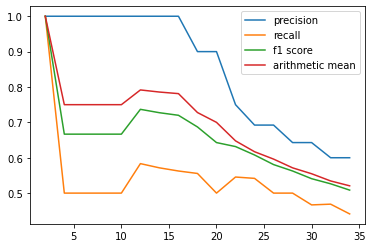

In [136]:
res = get_results(K_values, sample_query_1)
plot_graphs(query = sample_query_1, query_rel_col = "query_1_rel", true_q_total = true_q_total_1, results = res, K_vals = K_values)

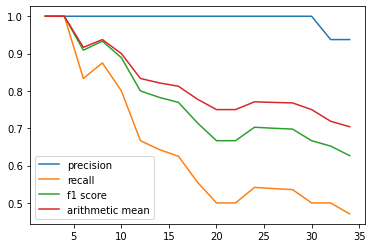

In [137]:
res = get_results(K_values, sample_query_2)
plot_graphs(query = sample_query_2, query_rel_col = "query_2_rel", true_q_total = true_q_total_2, results = res, K_vals = K_values)

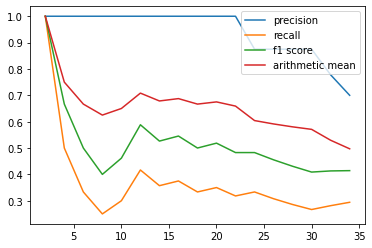

In [138]:
res = get_results(K_values, sample_query_3)
plot_graphs(query = sample_query_3, query_rel_col = "query_3_rel", true_q_total = true_q_total_3, results = res, K_vals = K_values)

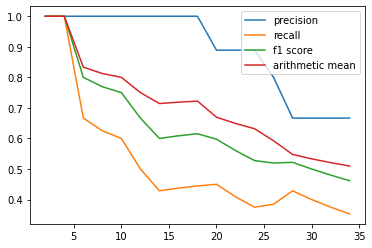

In [139]:
res = get_results(K_values, sample_query_4)
plot_graphs(query = sample_query_4, query_rel_col = "query_4_rel", true_q_total = true_q_total_4, results = res, K_vals = K_values)

In [140]:
data_100_titles['query_5_rel'].sum()
data_100_titles['query_2_rel'].sum()

28

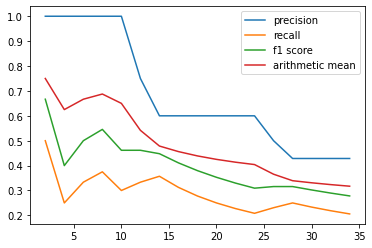

In [141]:
res = get_results(K_values, sample_query_5)
plot_graphs(query = sample_query_5, query_rel_col = "query_5_rel", true_q_total = true_q_total_5, results = res, K_vals = K_values)

# Enhanced Search Section

## Word Cloud

In [142]:
!pip install wordcloud

In [143]:
from wordcloud import WordCloud

In [144]:
# movie_reviews_df['title'][21]

In [145]:
# Get topK movie indexes relevant to sample query 1
res1 = get_results([10], sample_query_1)

In [146]:
res1[0]

0    62
1    89
2    43
3    39
4    19
5    27
6    18
7    34
8    21
9    38
Name: movie_index_list, dtype: int64

In [147]:
res1[0][0]

62

Title: Alien


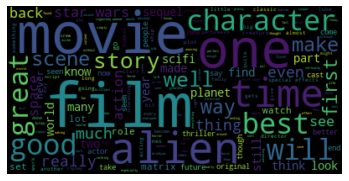

In [148]:
i = res1[0]
print("Title:", movie_reviews_df['title'][i[0]])
all_reviews_one_movie = ' '.join(movie_reviews_df['reviews'][i])
wordcloud = WordCloud().generate(all_reviews_one_movie)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()